#####A Comprehensive Analysis of the Industrial-scale Penicillin Simulation

Objective: Our goal in this analysis is to leverage the Industrial-scale Penicillin Simulation dataset to investigate and improve control strategies in large-scale fermentations. Our objectives include exploring the relationships between input parameters and their impacts on outcomes, identifying the batch achieving the highest penicillin concentration, and examining correlations between penicillin concentration and other variables. This study aims to advance bioprocess control and optimization in contemporary biopharmaceutical facilities. Currently, we are focusing on identifying variables highly correlated with penicillin concentration and developing regression equations to model these relationships.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/100_Batches_IndPenSim_V3.csv")

In [4]:
df.head()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.118,9.8335,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.221,18.1550,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.302,9.5982,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.816,4.3395,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.908,1.1045,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113935 entries, 0 to 113934
Columns: 2239 entries, Time (h) to 201
dtypes: float64(2225), int64(14)
memory usage: 1.9 GB


In [6]:
df.columns

Index(['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)',
       'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)',
       'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)',
       'Heating water flow rate(Fh:L/h)',
       'Water for injection/dilution(Fw:L/h)',
       'Air head pressure(pressure:bar)',
       ...
       '210', '209', '208', '207', '206', '205', '204', '203', '202', '201'],
      dtype='object', length=2239)

In [7]:
len(df.columns)

2239

In [8]:
df.isna().sum()

Time (h)                        0
Aeration rate(Fg:L/h)           0
Agitator RPM(RPM:RPM)           0
Sugar feed rate(Fs:L/h)         0
Acid flow rate(Fa:L/h)          0
                            ...  
205                             0
204                             0
203                             0
202                        113935
201                        113935
Length: 2239, dtype: int64

In [9]:
for index,value in enumerate(df.columns):
    print(index,value)

0 Time (h)
1 Aeration rate(Fg:L/h)
2 Agitator RPM(RPM:RPM)
3 Sugar feed rate(Fs:L/h)
4 Acid flow rate(Fa:L/h)
5 Base flow rate(Fb:L/h)
6 Heating/cooling water flow rate(Fc:L/h)
7 Heating water flow rate(Fh:L/h)
8 Water for injection/dilution(Fw:L/h)
9 Air head pressure(pressure:bar)
10 Dumped broth flow(Fremoved:L/h)
11 Substrate concentration(S:g/L)
12 Dissolved oxygen concentration(DO2:mg/L)
13 Penicillin concentration(P:g/L)
14 Vessel Volume(V:L)
15 Vessel Weight(Wt:Kg)
16 pH(pH:pH)
17 Temperature(T:K)
18 Generated heat(Q:kJ)
19 carbon dioxide percent in off-gas(CO2outgas:%)
20 PAA flow(Fpaa:PAA flow (L/h))
21 PAA concentration offline(PAA_offline:PAA (g L^{-1}))
22 Oil flow(Foil:L/hr)
23 NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))
24 Oxygen Uptake Rate(OUR:(g min^{-1}))
25 Oxygen in percent in off-gas(O2:O2  (%))
26 Offline Penicillin concentration(P_offline:P(g L^{-1}))
27 Offline Biomass concentratio(X_offline:X(g L^{-1}))
28 Carbon evolution rate(CER:g/h)
29 Ammonia 

Columns 2400, 2399, 2398... represents the radiation data, which is not affecting the target variable (pencillin concentration)
Drop columns 2400, 2399, 2398 and so on...

We set the  main dataframe with 38 columns as df

In [10]:
df = df.iloc[:, 0:38]

In [11]:
df.head()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID
0,0.2,30,100,8,0.0000,30.118,9.8335,0.0001,0,0.6,...,0.034045,0,NaN,0,0,1,1,1,0,0.0
1,0.4,30,100,8,0.0000,51.221,18.1550,0.0001,0,0.6,...,0.038702,0,NaN,0,0,1,1,1,0,0.0
2,0.6,30,100,8,0.0000,54.302,9.5982,0.0001,0,0.6,...,0.040240,0,NaN,0,0,1,1,1,0,0.0
3,0.8,30,100,8,0.0000,37.816,4.3395,0.0001,0,0.6,...,0.041149,0,NaN,0,0,1,1,1,0,0.0
4,1.0,30,100,8,0.5181,18.908,1.1045,0.0001,0,0.6,...,0.041951,0,4.083,0,0,1,1,1,0,0.0


In [12]:
len(df.columns)

38

Checking for Null Values

In [13]:
df.isna().sum()

Time (h)                                                                   0
Aeration rate(Fg:L/h)                                                      0
Agitator RPM(RPM:RPM)                                                      0
Sugar feed rate(Fs:L/h)                                                    0
Acid flow rate(Fa:L/h)                                                     0
Base flow rate(Fb:L/h)                                                     0
Heating/cooling water flow rate(Fc:L/h)                                    0
Heating water flow rate(Fh:L/h)                                            0
Water for injection/dilution(Fw:L/h)                                       0
Air head pressure(pressure:bar)                                            0
Dumped broth flow(Fremoved:L/h)                                            0
Substrate concentration(S:g/L)                                             0
Dissolved oxygen concentration(DO2:mg/L)                                   0

5 Columns have null records i.e. 111873 Null Records

Heat Map of Null Values

<Axes: >

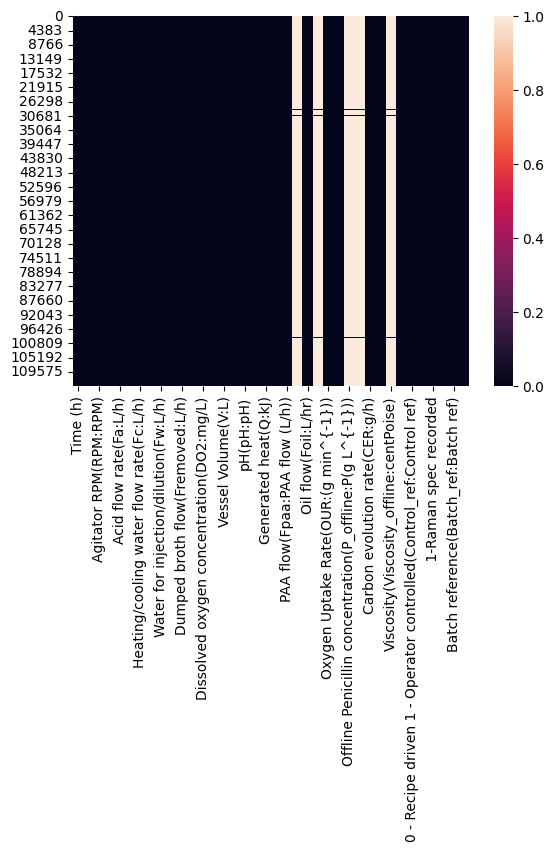

In [14]:
sns.heatmap(df.isnull())

Dropping the Columns that have 111873 Null Values

< 3% Null Values : Drop that row (if required)

3-40% Null Values : Clean the data

#> 40% Null Values : Drop that Column

In [15]:
113935 - 111873

2062

In [16]:
2062/113935 * 100

1.8098038355202528

There are approx 98% Null values so drop those 5 columns


In [17]:
df.isna().sum()[df.isna().sum()>0]

PAA concentration offline(PAA_offline:PAA (g L^{-1}))      111873
NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))    111873
Offline Penicillin concentration(P_offline:P(g L^{-1}))    111873
Offline Biomass concentratio(X_offline:X(g L^{-1}))        111873
Viscosity(Viscosity_offline:centPoise)                     111873
dtype: int64

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
df=df.drop(df.columns[df.isna().sum()>0],axis=1)

In [19]:
df.head()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Oxygen in percent in off-gas(O2:O2 (%)),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID
0,0.2,30,100,8,0.0000,30.118,9.8335,0.0001,0,0.6,...,0.19595,0.034045,0,0,0,1,1,1,0,0.0
1,0.4,30,100,8,0.0000,51.221,18.1550,0.0001,0,0.6,...,0.20390,0.038702,0,0,0,1,1,1,0,0.0
2,0.6,30,100,8,0.0000,54.302,9.5982,0.0001,0,0.6,...,0.20575,0.040240,0,0,0,1,1,1,0,0.0
3,0.8,30,100,8,0.0000,37.816,4.3395,0.0001,0,0.6,...,0.20602,0.041149,0,0,0,1,1,1,0,0.0
4,1.0,30,100,8,0.5181,18.908,1.1045,0.0001,0,0.6,...,0.20589,0.041951,0,0,0,1,1,1,0,0.0


# Check for Null values after cleaning the datatset

In [20]:
df.isnull().sum()

Time (h)                                                              0
Aeration rate(Fg:L/h)                                                 0
Agitator RPM(RPM:RPM)                                                 0
Sugar feed rate(Fs:L/h)                                               0
Acid flow rate(Fa:L/h)                                                0
Base flow rate(Fb:L/h)                                                0
Heating/cooling water flow rate(Fc:L/h)                               0
Heating water flow rate(Fh:L/h)                                       0
Water for injection/dilution(Fw:L/h)                                  0
Air head pressure(pressure:bar)                                       0
Dumped broth flow(Fremoved:L/h)                                       0
Substrate concentration(S:g/L)                                        0
Dissolved oxygen concentration(DO2:mg/L)                              0
Penicillin concentration(P:g/L)                                 

# Heatmap of cleaned dataframe

<Axes: >

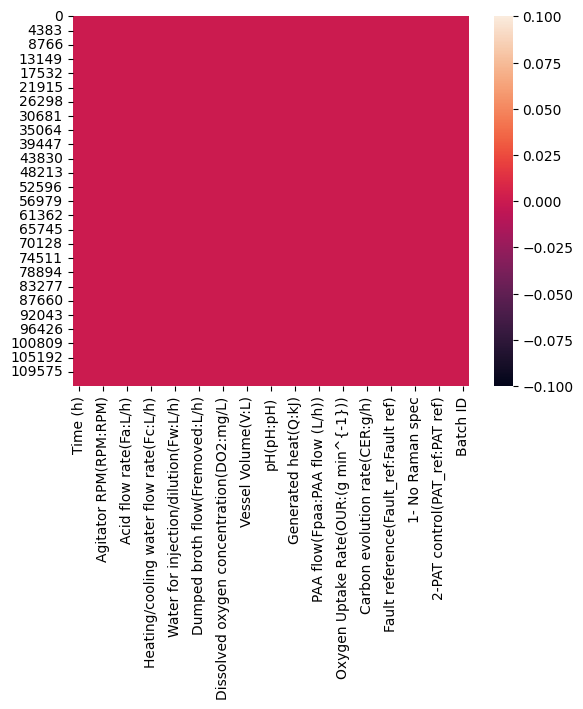

In [21]:
sns.heatmap(df.isnull())